In [34]:
# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as sts

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# URL
weather_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
print(weather_api_key)

fdb67c0867a57dc1d67961b8dbef4aa1


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [4]:
#  Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name).

citys = []
cloud = []
humid = []
lats = []
lngs = []
temp = []
wind = []
countries = []

count = 1


# loop for dataframe columns
for city in cities:
    print(f"Processing {count} || {city}")
    try:
        response = requests.get(weather_url + city.replace(" ","&")).json()
        citys.append(response['name'])
        cloud.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        humid.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
    except Exception:
        print("City not found. Skip me.")
    count += 1
print("End City List")

Processing 1 || kyra
Processing 2 || fortuna
Processing 3 || shache
Processing 4 || bluff
Processing 5 || clyde river
Processing 6 || kapaa
Processing 7 || rawson
Processing 8 || yellowknife
Processing 9 || rockport
Processing 10 || gamba
Processing 11 || ushuaia
Processing 12 || argayash
Processing 13 || mataura
Processing 14 || kolpashevo
Processing 15 || albany
Processing 16 || cape town
Processing 17 || minab
Processing 18 || vaini
Processing 19 || rundu
Processing 20 || punta arenas
Processing 21 || taolanaro
City not found. Skip me.
Processing 22 || sao felix do xingu
Processing 23 || port moresby
Processing 24 || east london
Processing 25 || barrow
Processing 26 || adrar
Processing 27 || acapulco
Processing 28 || kaitangata
Processing 29 || shingu
Processing 30 || cermik
Processing 31 || ponta do sol
Processing 32 || roblin
Processing 33 || bambous virieux
Processing 34 || auki
Processing 35 || rubiataba
Processing 36 || khatanga
Processing 37 || waipawa
Processing 38 || ribeira

Processing 287 || annau
Processing 288 || orotukan
Processing 289 || saint-augustin
Processing 290 || strandby
Processing 291 || barcelos
Processing 292 || pangnirtung
Processing 293 || powell river
Processing 294 || wajir
Processing 295 || meulaboh
Processing 296 || pascagoula
Processing 297 || mareeba
Processing 298 || beringovskiy
Processing 299 || san carlos de bariloche
Processing 300 || rongcheng
Processing 301 || pundaguitan
Processing 302 || zalantun
Processing 303 || nanortalik
Processing 304 || flinders
Processing 305 || iqaluit
Processing 306 || sechelt
Processing 307 || dibaya
City not found. Skip me.
Processing 308 || pokhara
Processing 309 || jalu
Processing 310 || antigonish
Processing 311 || mandalgovi
Processing 312 || fort nelson
Processing 313 || naryan-mar
Processing 314 || sabzevar
Processing 315 || taltal
Processing 316 || kuna
Processing 317 || agirish
Processing 318 || yamoussoukro
Processing 319 || valparaiso
Processing 320 || gold coast
Processing 321 || venge

Processing 555 || vodnyy
Processing 556 || umm lajj
City not found. Skip me.
Processing 557 || port augusta
Processing 558 || varnavino
Processing 559 || bara
Processing 560 || candido mota
Processing 561 || zaykovo
Processing 562 || jiuquan
Processing 563 || talesh
City not found. Skip me.
Processing 564 || marrakesh
Processing 565 || mayahi
Processing 566 || tumannyy
City not found. Skip me.
Processing 567 || codajas
Processing 568 || the valley
City not found. Skip me.
Processing 569 || amapa
Processing 570 || porto novo
Processing 571 || olavarria
Processing 572 || cesvaine
Processing 573 || bend
Processing 574 || caconda
Processing 575 || sabang
Processing 576 || wewak
Processing 577 || sao joao da barra
Processing 578 || arua
Processing 579 || upata
Processing 580 || necochea
Processing 581 || billings
Processing 582 || moroni
Processing 583 || tecpan
Processing 584 || gambela
Processing 585 || neiafu
Processing 586 || maningrida
Processing 587 || sitka
Processing 588 || tharrawa

In [5]:
# Convert Raw Data to DataFrame
# Export the city data into a .csv.
# Display the DataFrame
weather_dataframe = pd.DataFrame({
    "City": citys,
    "Cloudiness": cloud,
    "Country": countries,
    "Humidity": humid,
    "Latitude": lats,
    "Longitude": lngs,
    "Max Temperature": temp,
    "Wind Speeds": wind,
    })

weather_dataframe.to_csv('../WeatherPy/output_file.csv', index=False)

weather_dataframe.count()

City               536
Cloudiness         536
Country            536
Humidity           536
Latitude           536
Longitude          536
Max Temperature    536
Wind Speeds        536
dtype: int64

In [7]:
# Inspect the data and remove the cities where the humidity > 100%.
# Skip this step if there are no cities that have humidity > 100%.

weather_dataframe.loc[weather_dataframe['Humidity']>=100]

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Max Temperature,Wind Speeds
71,Hambantota,75,LK,100,6.12,81.12,77.00,2.24
139,Cayenne,98,GF,100,4.93,-52.33,77.00,13.87
208,Joniškis,90,LT,100,56.24,23.62,44.60,2.24
215,Ulladulla,90,AU,100,-35.35,150.47,59.00,21.92
266,Barcelos,90,PT,100,41.54,-8.62,62.60,10.29
293,Valparaíso,90,CL,100,-33.04,-71.63,57.20,4.70
330,Kiruna,39,SE,100,67.86,20.23,17.60,2.24
348,Alyangula,0,AU,100,-13.85,136.42,73.40,7.70
362,Szarvas,0,HU,100,46.87,20.55,39.99,4.70
421,Porto,90,PT,100,41.15,-8.61,62.60,10.29


In [8]:
# Get the indices of cities that have humidity over 100%.
upper_outliers = weather_dataframe.loc[weather_dataframe['Humidity']>=100].index
upper_outliers

Int64Index([71, 139, 208, 215, 266, 293, 330, 348, 362, 421, 434, 445, 470,
            507, 522],
           dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_dataframe.drop(upper_outliers)
clean_city_data

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Max Temperature,Wind Speeds
0,Kyra,12,RU,82,49.58,111.98,21.04,9.78
1,Fortuna,1,US,59,40.60,-124.16,68.00,8.05
2,Shache,0,CN,80,38.42,77.24,33.82,3.65
3,Bluff,97,NZ,82,-46.60,168.33,54.00,17.00
4,Clyde,0,US,55,41.30,-82.98,51.01,10.38
...,...,...,...,...,...,...,...,...
531,Villa di Tirano,0,IT,92,46.20,10.13,55.00,2.24
532,Catuday,79,PH,78,16.29,119.81,77.58,9.57
533,Kudahuvadhoo,80,MV,72,2.67,72.89,82.53,5.64
534,Verāval,0,IN,46,20.90,70.37,78.76,7.47


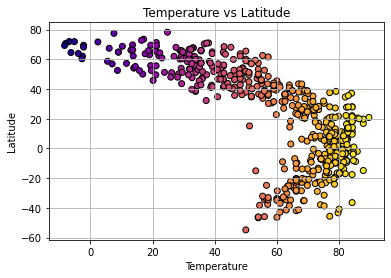

In [11]:
# Plotting the Data
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

plt.scatter(clean_city_data["Max Temperature"], clean_city_data["Latitude"], c=clean_city_data['Max Temperature'], edgecolors="black", cmap="plasma")
plt.title("Temperature vs Latitude")
plt.xlabel("Temperature (Degrees Fahrenheit)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

In [13]:
print("This plot shows temperature vs. latitude.  It clearly shows a relationship between higher temperatures and proximity to the equator.")

This plot shows temperature vs. latitude.  It clearly shows a relationship between higher temperatures and proximity to the equator.


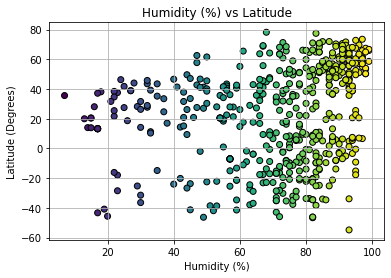

In [16]:
plt.scatter(clean_city_data["Humidity"], clean_city_data["Latitude"], c=clean_city_data['Humidity'], edgecolors="black", cmap="viridis")
plt.title("Humidity (%) vs Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

In [17]:
print("This plot shows humidity vs. latitude for weather in cities based on location.  There appears to be a mirroring effect across the equator for humidity, with similar humidity numbers at inverse latitude coordinates.")

This plot shows humidity vs. latitude for weather in cities based on location.  There appears to be a mirroring effect across the equator for humidity, with similar humidity numbers at inverse latitude coordinates.


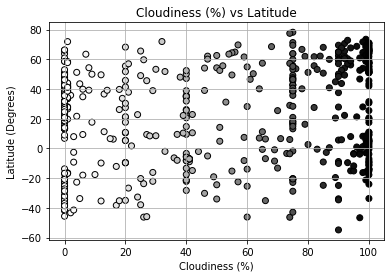

In [21]:
plt.scatter(clean_city_data["Cloudiness"], clean_city_data["Latitude"], c=clean_city_data['Cloudiness'], edgecolors="black", cmap="Greys")
plt.title("Cloudiness (%) vs Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

In [22]:
print("The percentage of cloudiness does not seem to be affected by latitude, as shown within this mostly evenly distributed graph.")

The percentage of cloudiness does not seem to be affected by latitude, as shown within this mostly evenly distributed graph.


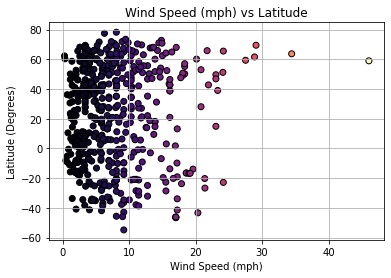

In [24]:
plt.scatter(clean_city_data["Wind Speeds"], clean_city_data["Latitude"], c=clean_city_data['Wind Speeds'], edgecolors="black", cmap="magma")
plt.title("Wind Speed (mph) vs Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

In [25]:
print("Wind speeds seem to not be affected by latitude much, showing an even distribution across the equator, with the exception of a few outliers in the Northern Hemisphere.")

Wind speeds seem to not be affected by latitude much, showing an even distribution across the equator, with the exception of a few outliers in the Northern Hemisphere.


In [29]:
# use .loc for northern and southern hemispheres
northern_hemi = weather_dataframe.loc[weather_dataframe['Latitude']>=0]
southern_hemi = weather_dataframe.loc[weather_dataframe['Latitude']<0]

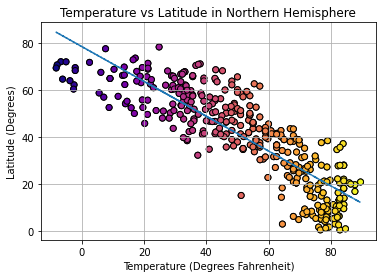

In [46]:
# Plot Max Temp vs Latitude for Northern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(northern_hemi["Max Temperature"], northern_hemi["Latitude"])
fit = slope * (northern_hemi["Max Temperature"]) + int
plt.plot(northern_hemi["Max Temperature"], fit, "--")

# Create the scatter plot
plt.scatter(northern_hemi["Max Temperature"], northern_hemi["Latitude"], c=northern_hemi['Max Temperature'], edgecolors="black", cmap="plasma")
plt.title("Temperature vs Latitude in Northern Hemisphere")
plt.xlabel("Temperature (Degrees Fahrenheit)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

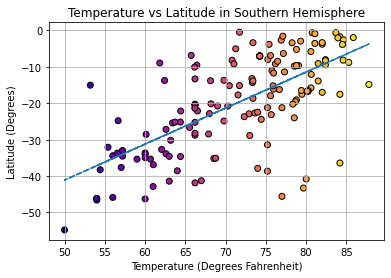

In [56]:
# Plot Max Temp vs Latitude for Southern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(southern_hemi["Max Temperature"], southern_hemi["Latitude"])
fit = slope * (southern_hemi["Max Temperature"]) + int
plt.plot(southern_hemi["Max Temperature"], fit, "--")

# Plot your scatter plot
plt.scatter(southern_hemi["Max Temperature"], southern_hemi["Latitude"], c=southern_hemi['Max Temperature'], edgecolors="black", cmap="plasma")
plt.title("Temperature vs Latitude in Southern Hemisphere")
plt.xlabel("Temperature (Degrees Fahrenheit)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

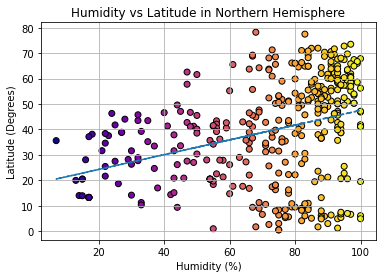

In [57]:
# Plot Max Temp vs Latitude for Northern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(northern_hemi["Humidity"], northern_hemi["Latitude"])
fit = slope * (northern_hemi["Humidity"]) + int
plt.plot(northern_hemi["Humidity"], fit, "--")

# Create your scatter plot
plt.scatter(northern_hemi["Humidity"], northern_hemi["Latitude"], c=northern_hemi['Humidity'], edgecolors="black", cmap="plasma")
plt.title("Humidity vs Latitude in Northern Hemisphere")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

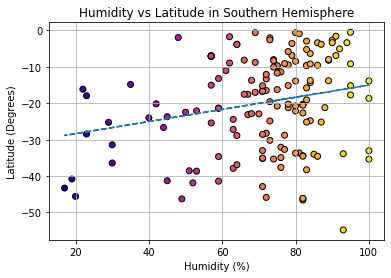

In [58]:
# Plot Humidity vs Latitude for Southern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(southern_hemi["Humidity"], southern_hemi["Latitude"])
fit = slope * (southern_hemi["Humidity"]) + int
plt.plot(southern_hemi["Humidity"], fit, "--")

# Plot your scatter plot
plt.scatter(southern_hemi["Humidity"], southern_hemi["Latitude"], c=southern_hemi['Humidity'], edgecolors="black", cmap="plasma")
plt.title("Humidity vs Latitude in Southern Hemisphere")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

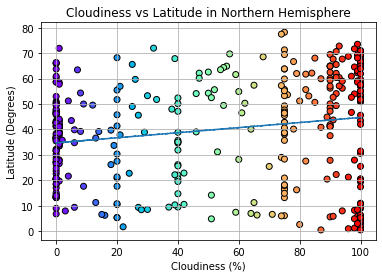

In [62]:
# Plot Cloudiness vs Latitude for Northern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(northern_hemi["Cloudiness"], northern_hemi["Latitude"])
fit = slope * (northern_hemi["Cloudiness"]) + int
plt.plot(northern_hemi["Cloudiness"], fit, "--")

# Make your scatter plot
plt.scatter(northern_hemi["Cloudiness"], northern_hemi["Latitude"], c=northern_hemi['Cloudiness'], edgecolors="black", cmap="rainbow")
plt.title("Cloudiness vs Latitude in Northern Hemisphere")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

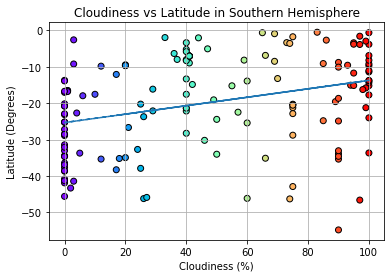

In [61]:
# Plot Cloudiness vs Latitude for Southern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(southern_hemi["Cloudiness"], southern_hemi["Latitude"])
fit = slope * (southern_hemi["Cloudiness"]) + int
plt.plot(southern_hemi["Cloudiness"], fit, "--")

# Plot the scatter plot!
plt.scatter(southern_hemi["Cloudiness"], southern_hemi["Latitude"], c=southern_hemi['Cloudiness'], edgecolors="black", cmap="rainbow")
plt.title("Cloudiness vs Latitude in Southern Hemisphere")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

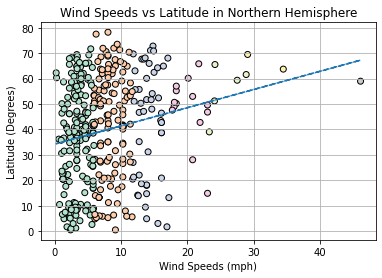

In [60]:
# Plot Wind Speeds vs Latitude for Northern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(northern_hemi["Wind Speeds"], northern_hemi["Latitude"])
fit = slope * (northern_hemi["Wind Speeds"]) + int
plt.plot(northern_hemi["Wind Speeds"], fit, "--")

# Plot the scatter plot!
plt.scatter(northern_hemi["Wind Speeds"], northern_hemi["Latitude"], c=northern_hemi['Wind Speeds'], edgecolors="black", cmap="Pastel2")
plt.title("Wind Speeds vs Latitude in Northern Hemisphere")
plt.xlabel("Wind Speeds (mph)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()

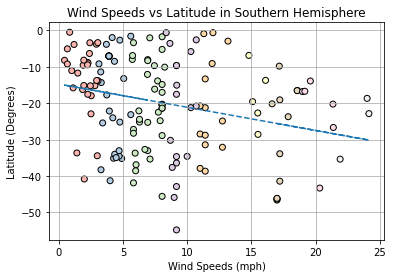

In [59]:
# Plot Wind Speeds vs Latitude for Southern Hemisphere
# Create the line of regression
slope, int, r, p, std_err = sts.linregress(southern_hemi["Wind Speeds"], southern_hemi["Latitude"])
fit = slope * (southern_hemi["Wind Speeds"]) + int
plt.plot(southern_hemi["Wind Speeds"], fit, "--")

# Plot the scatter plot!
plt.scatter(southern_hemi["Wind Speeds"], southern_hemi["Latitude"], c=southern_hemi['Wind Speeds'], edgecolors="black", cmap="Pastel1")
plt.title("Wind Speeds vs Latitude in Southern Hemisphere")
plt.xlabel("Wind Speeds (mph)")
plt.ylabel("Latitude (Degrees)")
plt.grid()
plt.show()